Stephane Keil Rios
160559
Regresion Lineal

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

In [4]:
data = pd.read_csv("regLin.csv")
data

,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144
5,55.003337,44.274354
6,78.375881,49.032737
7,15.286028,13.862727
8,81.066092,55.742546
9,35.059204,30.345383


In [5]:
data.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data[["X"]],data[["y"]], train_size=0.75)
Y_test

,y
811,27.031914
643,39.467977
348,45.176607
198,17.510707
440,31.303426
420,50.210969
325,12.470283
442,23.961208
538,32.754272
541,13.617328


In [7]:
lr = LinearRegression()
modelo = lr.fit(X_train,Y_train)

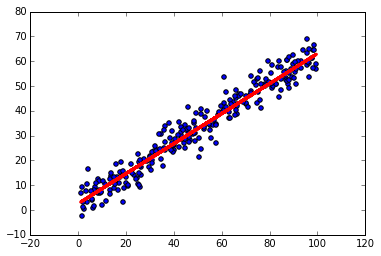

In [8]:
plt.scatter(X_test,Y_test)
plt.plot(X_test, lr.predict(X_test), color='red', linewidth=3)

In [9]:
print('Constante: ',lr.intercept_[0],'Coefficiente X: ', lr.coef_[0][0])

('Constante: ', 2.6099100814854843, 'Coefficiente X: ', 0.60460401624319882)


In [40]:

w0_random = np.linspace(lr.intercept_[0]-5,lr.intercept_[0]+10,40)
print w0_random

[ -2.39008992  -2.00547453  -1.62085915  -1.23624376  -0.85162838
  -0.467013    -0.08239761   0.30221777   0.68683316   1.07144854
   1.45606393   1.84067931   2.2252947    2.60991008   2.99452547
   3.37914085   3.76375624   4.14837162   4.532987     4.91760239
   5.30221777   5.68683316   6.07144854   6.45606393   6.84067931
   7.2252947    7.60991008   7.99452547   8.37914085   8.76375624
   9.14837162   9.532987     9.91760239  10.30221777  10.68683316
  11.07144854  11.45606393  11.84067931  12.2252947   12.60991008]


In [43]:
error = []
for i in w0_random:
    y_predecida = lr.coef_[0]*data['X'] + i
    resta = y_predecida - data['y']
    cuadrado = resta**2
    error.append(np.mean(cuadrado))

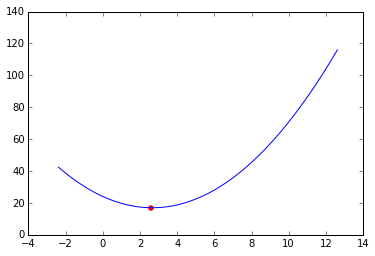

In [44]:
plt.plot(w0_random,error)
plt.scatter(lr.intercept_[0],np.mean(((lr.coef_[0][0]*data['X'] + lr.intercept_[0] )-data['y'])**2),color="red")

In [46]:

w1_random = np.linspace(lr.coef_[0][0]-5,lr.coef_[0][0]+10,40)
print w1_random

[ -4.39539598  -4.0107806   -3.62616521  -3.24154983  -2.85693445
  -2.47231906  -2.08770368  -1.70308829  -1.31847291  -0.93385752
  -0.54924214  -0.16462675   0.21998863   0.60460402   0.9892194
   1.37383479   1.75845017   2.14306555   2.52768094   2.91229632
   3.29691171   3.68152709   4.06614248   4.45075786   4.83537325
   5.21998863   5.60460402   5.9892194    6.37383479   6.75845017
   7.14306555   7.52768094   7.91229632   8.29691171   8.68152709
   9.06614248   9.45075786   9.83537325  10.21998863  10.60460402]


In [45]:
error1 = []
for i in w1_random:
    y_predecida = i*data['X'] + lr.intercept_[0]
    resta = y_predecida - data['y']
    cuadrado = resta**2
    error1.append(np.mean(cuadrado))

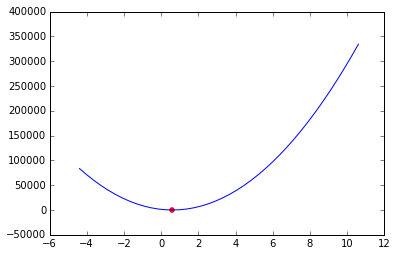

In [48]:
plt.plot(w1_random,error1)
plt.scatter(lr.coef_[0][0],np.mean(((lr.coef_[0][0]*data['X'] + lr.intercept_[0] )-data['y'])**2),color="red")

In [13]:
np.mean(((lr.coef_[0][0]*data['X'] + lr.intercept_[0] )-data['y'])**2)

16.95518283969714

In [30]:
np.mean(((lr.coef_[0][0]*X_train + lr.intercept_[0]).iloc[0:X_train.shape[0],0]-Y_train.iloc[0:Y_train.shape[0],0])**2)

16.86839847210356

In [29]:
np.mean(((lr.coef_[0][0]*X_test + lr.intercept_[0]).iloc[0:X_test.shape[0],0]-Y_test.iloc[0:Y_test.shape[0],0])**2)

17.214526821924476